In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv('data.csv')
data.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


<Axes: >

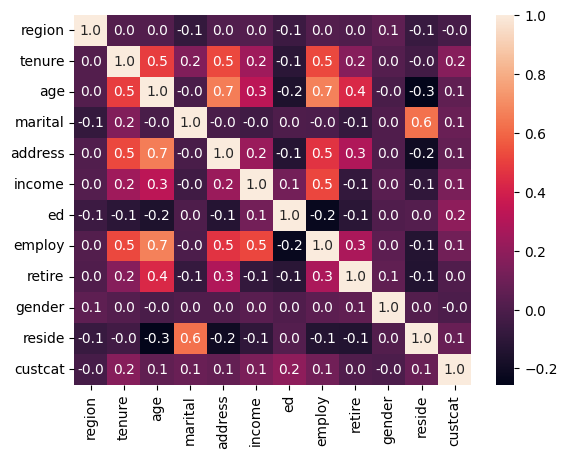

In [7]:
correl = data.corr()
sns.heatmap(correl, annot = True, fmt = '.1f')

<Axes: xlabel='ed', ylabel='Count'>

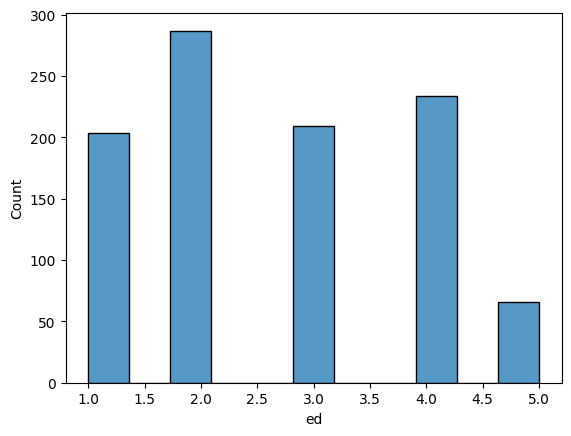

In [8]:
sns.histplot(data['ed'])

<Axes: xlabel='tenure', ylabel='Count'>

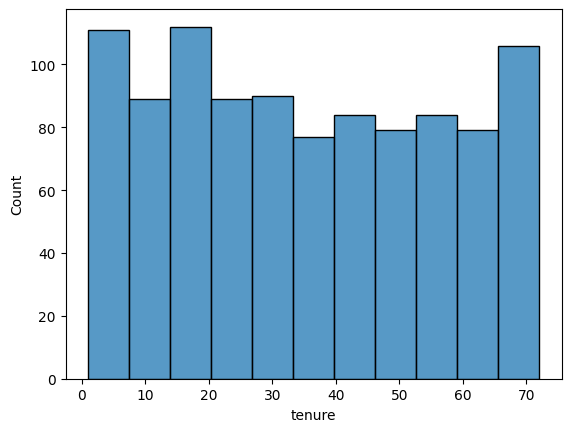

In [9]:
sns.histplot(data['tenure'])

In [10]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
scaler = preprocessing.MinMaxScaler().fit(data)
new_data = scaler.transform(data)
new_data = pd.DataFrame(new_data)
print(new_data.head())
X = new_data.to_numpy()
Y = X[:,-1]
X = X[:,0:-1]

    0         1         2    3         4         5     6         7    8    9   \
0  0.5  0.169014  0.440678  1.0  0.163636  0.033153  0.75  0.106383  0.0  0.0   
1  1.0  0.140845  0.254237  1.0  0.127273  0.076552  1.00  0.106383  0.0  0.0   
2  1.0  0.943662  0.576271  1.0  0.436364  0.064497  0.00  0.617021  0.0  1.0   
3  0.5  0.450704  0.254237  0.0  0.218182  0.014467  0.25  0.000000  0.0  1.0   
4  0.5  0.309859  0.203390  1.0  0.163636  0.012658  0.00  0.042553  0.0  0.0   

         10        11  
0  0.142857  0.000000  
1  0.714286  1.000000  
2  0.142857  0.666667  
3  0.000000  0.000000  
4  0.428571  0.666667  


In [11]:
tmp = np.zeros((1000, 4))
for i in range(1000):
    if round(Y[i], 1) == 0:
        tmp[i,0] = 1
    if round(Y[i], 1) == 0.3:
        tmp[i,1] = 1
    if round(Y[i], 1) == 0.7:
        tmp[i,2] = 1
    if round(Y[i], 1) == 1:
        tmp[i,3] = 1

Y = tmp


In [12]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=43)
x_test, x_val, y_test, y_val = train_test_split(x_test, y_test, test_size=0.25, random_state=43)
print(y_test.shape)
print(y_val.shape)
print(x_train.shape)


(150, 4)
(50, 4)
(800, 11)


In [13]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
model = Sequential(
    [ 
        Dense(20),    #input layer
        Dense(16),  
        Dense(12),
        Dense(4, activation = 'softmax')    #output layer
    ]
)
model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
)

model.fit(
    x_train,y_train,
    epochs=200,
    batch_size = 400
)

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 1.4992  
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4964  
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4781 
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4712
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4646  
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4546 
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4496 
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4411 
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4388 
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4373 
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4352  
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4272 
Epoch 13/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4290  
Epoch 14/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4209 
Epoch 15/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4314  
Epoch 16/200
2

In [ ]:
Y_pred = model.predict(x_test)
y_pred_classes = Y_pred.argmax(axis=1)  # Convert probabilities to class labels
y_true_classes = y_test.argmax(axis=1)  # Convert true labels if one-hot encoded


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


2

Accuracy: 0.3600


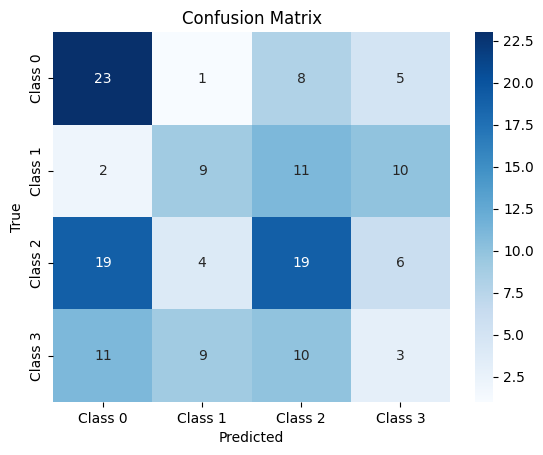

In [305]:
from sklearn.metrics import confusion_matrix
accuracy = (y_true_classes == y_pred_classes).mean()
print(f"Accuracy: {accuracy:.4f}")
cm = confusion_matrix(y_true_classes, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4112  
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4049  
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4123  
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4097  
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4100
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4035
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4077  
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3953 
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3959
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3895
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3947
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3975 
Epoch 13/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3988  
Epoch 14/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3918  
Epoch 15/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3936  
Epoch 16/200
2/2

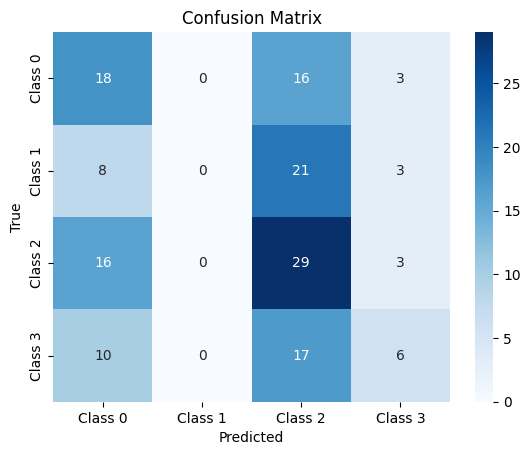

In [ ]:
model2 = Sequential(
    [ 
        Dense(20),    #input layer
        Dense(16),  
        Dense(4, activation = 'softmax')    #output layer
    ]
)
model2.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
)

model2.fit(
    x_train,y_train,
    epochs=200,
    batch_size = 400
)
Y_pred2 = model2.predict(x_test)
y_pred_classes2 = Y_pred2.argmax(axis=1)  # Convert probabilities to class labels
y_true_classes2 = y_test.argmax(axis=1)  # Convert true labels if one-hot encoded
accuracy2 = (y_true_classes2 == y_pred_classes2).mean()
print(f"Accuracy: {accuracy2:.4f}")
cm2 = confusion_matrix(y_true_classes2, y_pred_classes2)
sns.heatmap(cm2, annot=True, fmt='g', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 1.8446
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7913 
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7260  
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6719  
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6479  
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6105 
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5814  
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5627  
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5319 
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5201  
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.4891
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4772 
Epoch 13/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4670  
Epoch 14/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4390 
Epoch 15/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4269
Epoch 16/200
2

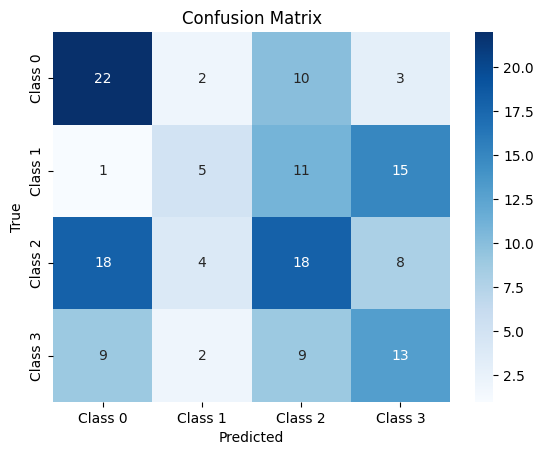

In [341]:
model3 = Sequential(
    [ 
        Dense(20),    #input layer
        tf.keras.layers.BatchNormalization(),      # Batch normalization layer
        Dense(16),  
        Dense(12),
        Dense(4, activation = 'softmax')    #output layer
    ]
)
model3.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
)

model3.fit(
    x_train,y_train,
    epochs=200,
    batch_size = 400
)
Y_pred3 = model3.predict(x_test)
y_pred_classes3 = Y_pred3.argmax(axis=1)  # Convert probabilities to class labels
y_true_classes3 = y_test.argmax(axis=1)  # Convert true labels if one-hot encoded
accuracy3 = (y_true_classes3 == y_pred_classes3).mean()
print(f"Accuracy: {accuracy3:.4f}")
cm3 = confusion_matrix(y_true_classes3, y_pred_classes3)
sns.heatmap(cm3, annot=True, fmt='g', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.88203
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8190
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7858
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7152
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6715  
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 985us/step - loss: 1.6402
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5974
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5597 
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5422
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5106
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4885
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4716  
Epoch 13/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.4528  
Epoch 14/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4344  
Epoch 15/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4137
Epoch 16/200
2/2 ━━━━━

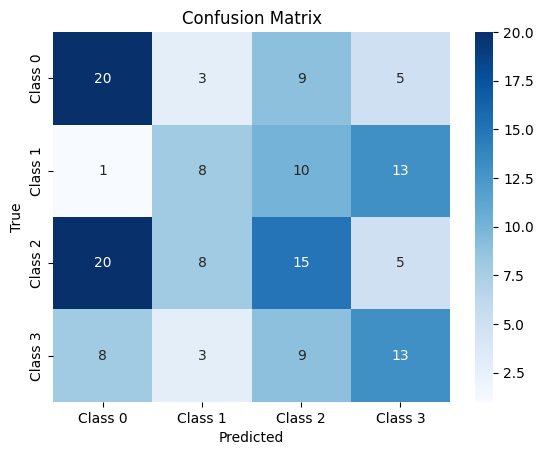

In [342]:
model4 = Sequential(
    [ 
        Dense(20),    #input layer
        tf.keras.layers.BatchNormalization(),      # Batch normalization layer
        Dense(16),  
        Dense(4, activation = 'softmax')    #output layer
    ]
)
model4.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
)

model4.fit(
    x_train,y_train,
    epochs=200,
    batch_size = 400
)
Y_pred4 = model4.predict(x_test)
y_pred_classes4 = Y_pred4.argmax(axis=1)  # Convert probabilities to class labels
y_true_classes4 = y_test.argmax(axis=1)  # Convert true labels if one-hot encoded
accuracy4 = (y_true_classes4 == y_pred_classes4).mean()
print(f"Accuracy: {accuracy4:.4f}")
cm4 = confusion_matrix(y_true_classes4, y_pred_classes4)
sns.heatmap(cm4, annot=True, fmt='g', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 2.4739  
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.3452  
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1892  
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.0689  
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.0756  
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9061  
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 986us/step - loss: 1.8847
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7766 
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8253
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7867 
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8272
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.8127  
Epoch 13/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7466
Epoch 14/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7035  
Epoch 15/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6638  
Epoch 16/200

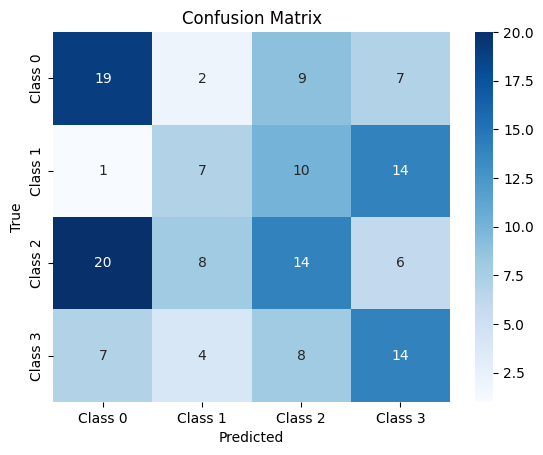

In [344]:
model5 = Sequential(
    [ 
        Dense(20),    #input layer
        tf.keras.layers.BatchNormalization(),      # Batch normalization layer
        Dense(16), 
        tf.keras.layers.Dropout(0.25), 
        Dense(12),
        tf.keras.layers.Dropout(0.25),
        Dense(4, activation = 'softmax')    #output layer
    ]
)
model5.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
)

model5.fit(
    x_train,y_train,
    epochs=200,
    batch_size = 400
)
Y_pred5 = model5.predict(x_test)
y_pred_classes5 = Y_pred5.argmax(axis=1)  # Convert probabilities to class labels
y_true_classes5 = y_test.argmax(axis=1)  # Convert true labels if one-hot encoded
accuracy5 = (y_true_classes5 == y_pred_classes5).mean()
print(f"Accuracy: {accuracy5:.4f}")
cm5 = confusion_matrix(y_true_classes5, y_pred_classes5)
sns.heatmap(cm5, annot=True, fmt='g', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.0710  
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 1.9493
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.9001
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8408  
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7972  
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7758  
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 622ms/step - loss: 1.7168
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6983  
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6640  
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6309  
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5928  
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5833  
Epoch 13/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5917  
Epoch 14/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5694 
Epoch 15/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5569
Epoch 16/2

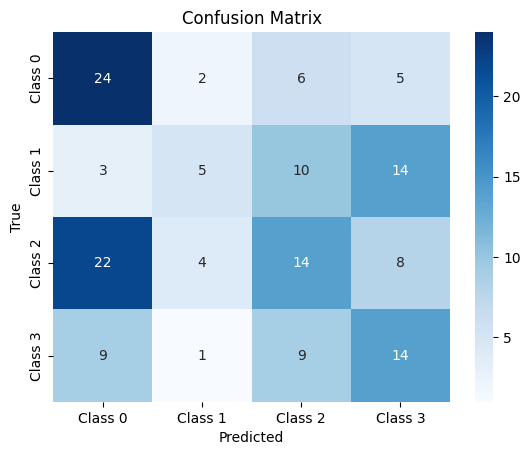

In [345]:
model6 = Sequential(
    [ 
        Dense(20),    #input layer
        tf.keras.layers.BatchNormalization(),      # Batch normalization layer
        Dense(16), 
        tf.keras.layers.Dropout(0.25), 
        Dense(4, activation = 'softmax')    #output layer
    ]
)
model6.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
)

model6.fit(
    x_train,y_train,
    epochs=200,
    batch_size = 400
)
Y_pred6 = model6.predict(x_test)
y_pred_classes6 = Y_pred6.argmax(axis=1)  # Convert probabilities to class labels
y_true_classes6 = y_test.argmax(axis=1)  # Convert true labels if one-hot encoded
accuracy6 = (y_true_classes6 == y_pred_classes6).mean()
print(f"Accuracy: {accuracy6:.4f}")
cm6 = confusion_matrix(y_true_classes6, y_pred_classes6)
sns.heatmap(cm6, annot=True, fmt='g', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 1.8054  
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.7322 
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6359  
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5924  
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5557  
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.5219
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 1.5069
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4646  
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4382
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4263  
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4180 
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3920
Epoch 13/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3771  
Epoch 14/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3670  
Epoch 15/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3640  
Epoch 16/200

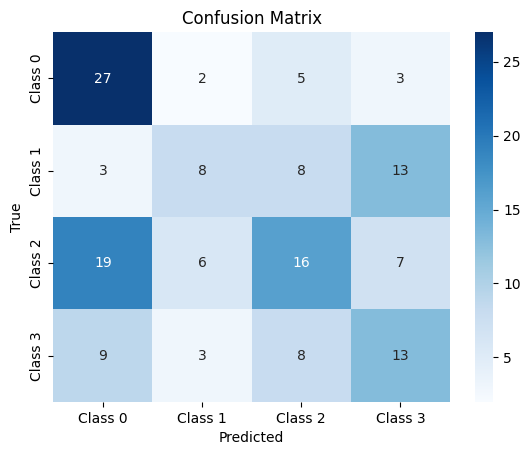

In [346]:
model7 = Sequential(
    [ 
        Dense(20),    #input layer
        tf.keras.layers.BatchNormalization(),      # Batch normalization layer
        Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.0001)), 
        Dense(12, kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        Dense(4, activation = 'softmax')    #output layer
    ]
)
model7.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
)

model7.fit(
    x_train,y_train,
    epochs=200,
    batch_size = 400
)
Y_pred7 = model7.predict(x_test)
y_pred_classes7 = Y_pred7.argmax(axis=1)  # Convert probabilities to class labels
y_true_classes7 = y_test.argmax(axis=1)  # Convert true labels if one-hot encoded
accuracy7 = (y_true_classes7 == y_pred_classes7).mean()
print(f"Accuracy: {accuracy7:.4f}")
cm7 = confusion_matrix(y_true_classes7, y_pred_classes7)
sns.heatmap(cm7, annot=True, fmt='g', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 706us/step
Accuracy: 0.4512


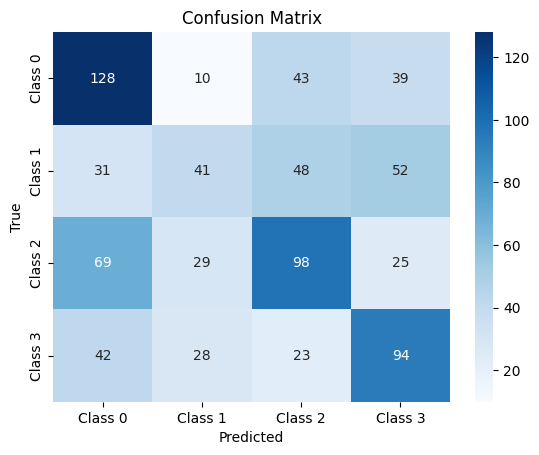

In [357]:
Y_pred72 = model7.predict(x_train)
y_pred_classes72 = Y_pred72.argmax(axis=1)  # Convert probabilities to class labels
y_true_classes72 = y_train.argmax(axis=1)  # Convert true labels if one-hot encoded
accuracy72 = (y_true_classes72 == y_pred_classes72).mean()
print(f"Accuracy: {accuracy72:.4f}")
cm72 = confusion_matrix(y_true_classes72, y_pred_classes72)
sns.heatmap(cm72, annot=True, fmt='g', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [358]:
for i in range(10):
    print(f"predicted value: {y_pred_classes72[i]} | actuall value: {y_true_classes72[i]}")

predicted value: 0 | actuall value: 1
predicted value: 3 | actuall value: 3
predicted value: 3 | actuall value: 0
predicted value: 3 | actuall value: 3
predicted value: 3 | actuall value: 3
predicted value: 0 | actuall value: 0
predicted value: 3 | actuall value: 3
predicted value: 0 | actuall value: 2
predicted value: 2 | actuall value: 0
predicted value: 1 | actuall value: 1


Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.9406  
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.9197
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8236  
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.7607
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.7291  
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6925
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6598 
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6110
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.6014 
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.5641
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5499
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - loss: 1.5271
Epoch 13/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5013 
Epoch 14/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4982
Epoch 15/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4742  
Epoch 16/200
2/2 ━━━━

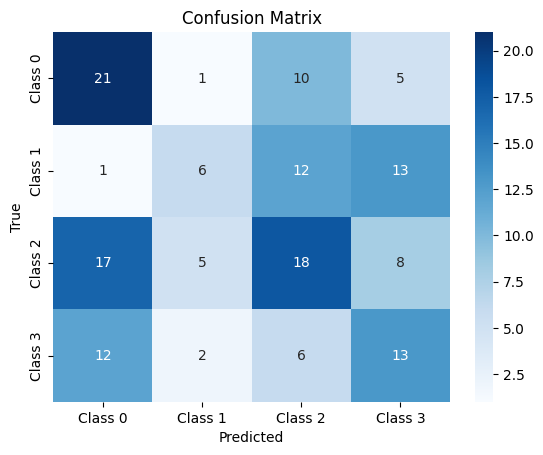

In [347]:
model8 = Sequential(
    [ 
        Dense(20),    #input layer
        tf.keras.layers.BatchNormalization(),      # Batch normalization layer
        Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.0001)), 
        Dense(4, activation = 'softmax')    #output layer
    ]
)
model8.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.SGD(),
)

model8.fit(
    x_train,y_train,
    epochs=200,
    batch_size = 400
)
Y_pred8 = model8.predict(x_test)
y_pred_classes8 = Y_pred8.argmax(axis=1)  # Convert probabilities to class labels
y_true_classes8 = y_test.argmax(axis=1)  # Convert true labels if one-hot encoded
accuracy8 = (y_true_classes8 == y_pred_classes8).mean()
print(f"Accuracy: {accuracy8:.4f}")
cm8 = confusion_matrix(y_true_classes8, y_pred_classes8)
sns.heatmap(cm8, annot=True, fmt='g', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

Epoch 1/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 1.6460 
Epoch 2/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.5371  
Epoch 3/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4740  
Epoch 4/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4276  
Epoch 5/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3998 
Epoch 6/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1.3680 
Epoch 7/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3556 
Epoch 8/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3370  
Epoch 9/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3181  
Epoch 10/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.3130  
Epoch 11/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2903
Epoch 12/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2812  
Epoch 13/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2748  
Epoch 14/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.2652  
Epoch 15/200
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.2560  
Epoch 16/

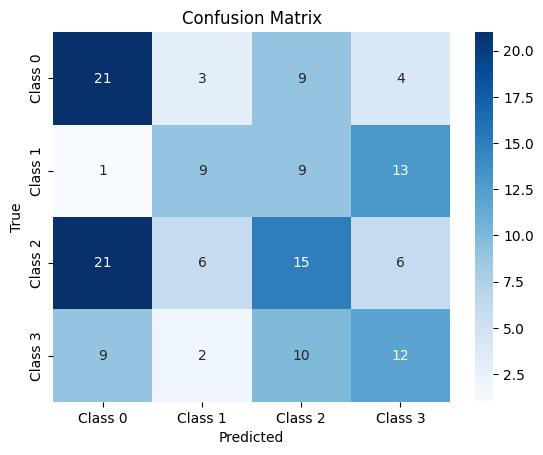

In [356]:
model9 = Sequential(
    [ 
        Dense(20),    #input layer
        tf.keras.layers.BatchNormalization(),      # Batch normalization layer
        Dense(16, kernel_regularizer=tf.keras.regularizers.l2(0.0001)), 
        Dense(12, kernel_regularizer=tf.keras.regularizers.l2(0.0001)),
        Dense(4, activation = 'softmax')    #output layer
    ]
)
model9.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.RMSprop(),
)

model9.fit(
    x_train,y_train,
    epochs=200,
    batch_size = 400
)
Y_pred9 = model9.predict(x_test)
y_pred_classes9 = Y_pred9.argmax(axis=1)  # Convert probabilities to class labels
y_true_classes9 = y_test.argmax(axis=1)  # Convert true labels if one-hot encoded
accuracy9 = (y_true_classes9 == y_pred_classes9).mean()
print(f"Accuracy: {accuracy9:.4f}")
cm9 = confusion_matrix(y_true_classes9, y_pred_classes9)
sns.heatmap(cm9, annot=True, fmt='g', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'],
            yticklabels=['Class 0', 'Class 1', 'Class 2', 'Class 3'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()